# imports 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
pd.options.display.max_rows = 500

# load data

In [3]:
day = -2
market_data = pd.read_csv(f"./tutorial_data.csv", sep=";", header=0)
#trade_history = pd.read_csv(f"./round-1-island-data-bottle/trades_round_1_day_{day}_nn.csv", sep=";", header=0)

In [4]:
market_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.000000
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.000000
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.000000
3,-1,100,RAINFOREST_RESIN,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,2.000000
4,-1,200,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-1,199700,KELP,2020,27,NaN,NaN,NaN,NaN,2023,2,2024.0,25.0,NaN,NaN,2021.5,-36.468750
3996,-1,199800,RAINFOREST_RESIN,9995,21,NaN,NaN,NaN,NaN,10002,8,10005.0,21.0,NaN,NaN,9998.5,52.000000
3997,-1,199800,KELP,2020,21,NaN,NaN,NaN,NaN,2023,21,NaN,NaN,NaN,NaN,2021.5,-34.406250
3998,-1,199900,KELP,2020,32,NaN,NaN,NaN,NaN,2022,7,2023.0,2.0,2024.0,30.0,2021.0,-38.648438


# research

In [5]:
RAINFOREST_RESIN_data = market_data[market_data['product'] == 'RAINFOREST_RESIN'].reset_index(drop=True)

In [7]:
RAINFOREST_RESIN_data['bid_volume_1'].value_counts()

1     616
2     533
3      63
21     63
30     59
27     58
5      56
22     53
24     53
25     46
23     46
26     45
6      43
20     41
29     40
4      39
8      34
28     32
9      31
7      29
10     18
12      1
11      1
Name: bid_volume_1, dtype: int64

In [21]:
print(max(RAINFOREST_RESIN_data['bid_price_1']),min(RAINFOREST_RESIN_data['ask_price_1']))
print(RAINFOREST_RESIN_data['bid_price_1'].value_counts(),(RAINFOREST_RESIN_data['ask_price_1'].value_counts()))

10002 9998
9996     955
9995     536
9998     299
10002    176
10000     34
Name: bid_price_1, dtype: int64 10004    1006
10005     545
10002     259
9998      153
10000      37
Name: ask_price_1, dtype: int64


In [22]:
KELP_data = market_data[market_data['product'] == 'KELP'].reset_index(drop=True)
KELP_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.000000
1,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.000000
2,-1,200,KELP,2025,22,NaN,NaN,NaN,NaN,2028,20,NaN,NaN,NaN,NaN,2026.5,0.000000
3,-1,300,KELP,2025,31,NaN,NaN,NaN,NaN,2028,2,2029.0,29.0,NaN,NaN,2026.5,0.000000
4,-1,400,KELP,2025,27,NaN,NaN,NaN,NaN,2028,27,NaN,NaN,NaN,NaN,2026.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1,199500,KELP,2020,23,NaN,NaN,NaN,NaN,2024,23,NaN,NaN,NaN,NaN,2022.0,-51.328125
1996,-1,199600,KELP,2020,22,NaN,NaN,NaN,NaN,2023,1,2024.0,21.0,NaN,NaN,2021.5,-40.867188
1997,-1,199700,KELP,2020,27,NaN,NaN,NaN,NaN,2023,2,2024.0,25.0,NaN,NaN,2021.5,-36.468750
1998,-1,199800,KELP,2020,21,NaN,NaN,NaN,NaN,2023,21,NaN,NaN,NaN,NaN,2021.5,-34.406250


In [23]:
print(KELP_data['bid_price_1'].value_counts(),(KELP_data['ask_price_1'].value_counts()))

2018    259
2013    221
2015    215
2014    193
2019    193
2023    179
2017    159
2020    146
2024    104
2016     96
2022     64
2012     59
2021     56
2025     32
2011     11
2026      6
2010      5
2028      1
2009      1
Name: bid_price_1, dtype: int64 2021    231
2016    215
2018    210
2022    206
2017    197
2026    163
2020    152
2023    147
2019    116
2027     98
2025     64
2015     64
2024     63
2014     41
2028     20
2013     11
2029      1
2012      1
Name: ask_price_1, dtype: int64


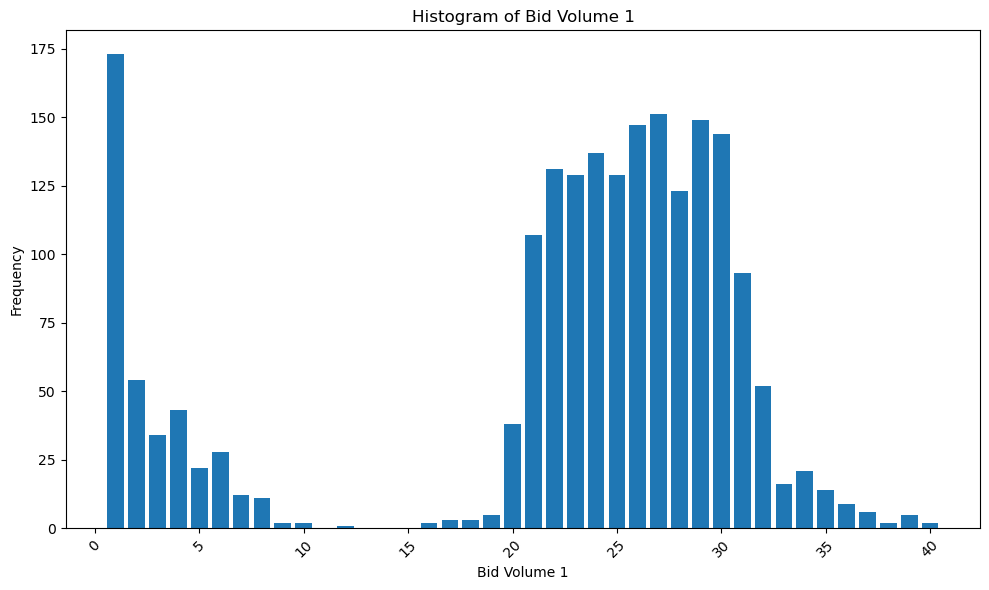

In [24]:
# Get the value counts of bid_volume_1
bid_volume_counts = KELP_data['bid_volume_1'].value_counts()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(bid_volume_counts.index, bid_volume_counts.values)
plt.xlabel('Bid Volume 1')
plt.ylabel('Frequency')
plt.title('Histogram of Bid Volume 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

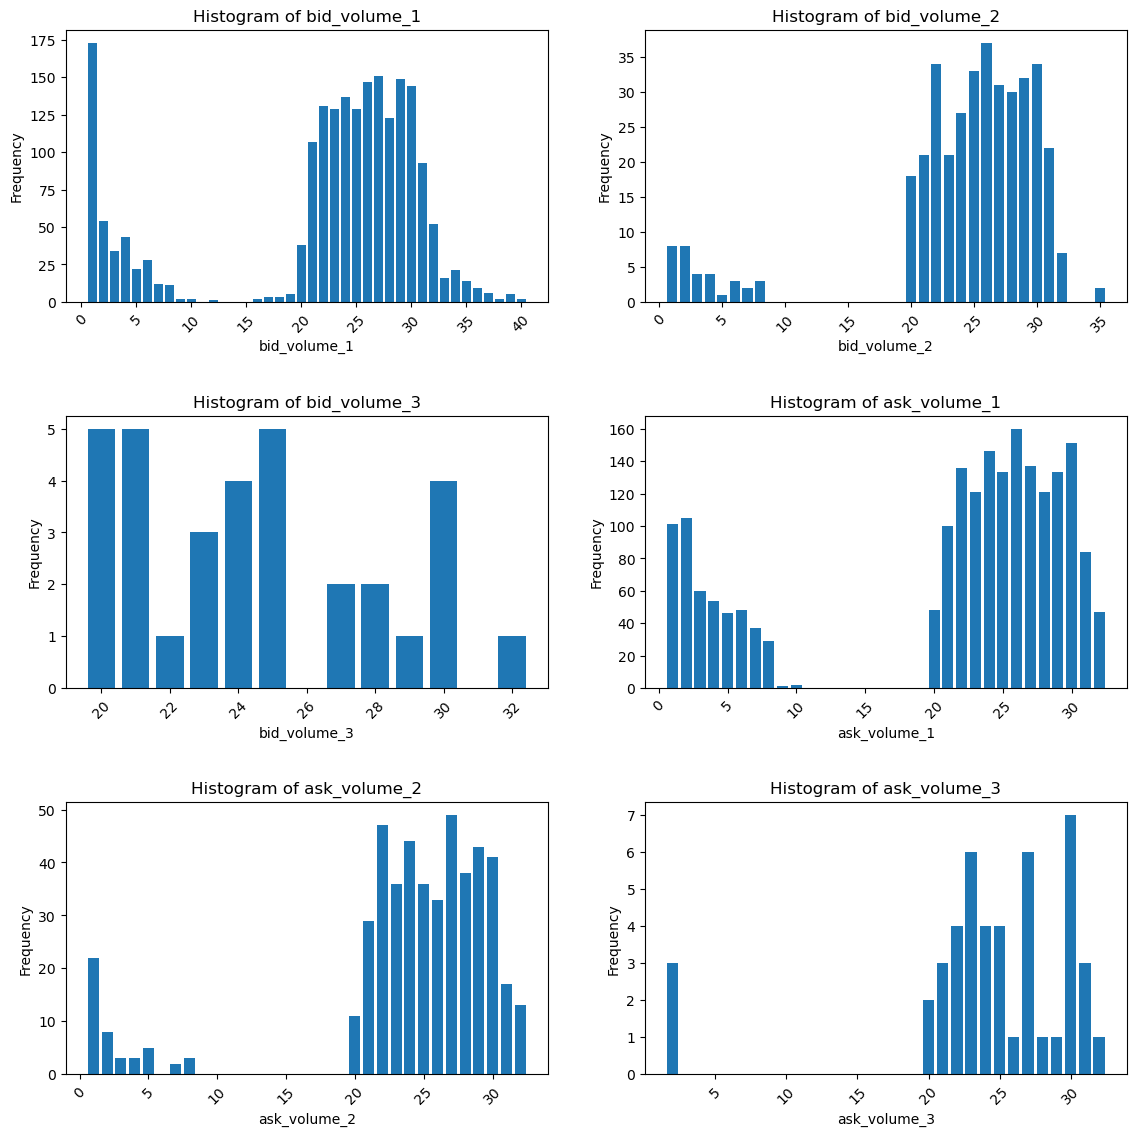

In [25]:
columns_to_plot = ['bid_volume_1', 'bid_volume_2', 'bid_volume_3',
                   'ask_volume_1', 'ask_volume_2', 'ask_volume_3']

num_plots = len(columns_to_plot)
num_rows = (num_plots + 1) // 2
num_cols = 2

plt.figure(figsize=(12, 4 * num_rows))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(num_rows, num_cols, i)
    
    volume_counts = KELP_data[column].value_counts()
    
    plt.bar(volume_counts.index, volume_counts.values)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)

plt.show()

In [26]:
def calculate_mm_mid(row):
    # Find the best bid with volume >= 20
    for i in range(1, 4):
        if row[f'bid_volume_{i}'] >= 20:
            best_bid = row[f'bid_price_{i}']
            break
    else:
        best_bid = None

    # Find the best ask with volume >= 20
    for i in range(1, 4):
        if row[f'ask_volume_{i}'] >= 20:
            best_ask = row[f'ask_price_{i}']
            break
    else:
        best_ask = None

    # Calculate the mid price if both best bid and ask are found
    if best_bid is not None and best_ask is not None:
        return (best_bid + best_ask) / 2
    else:
        return None

KELP_data['mm_mid'] = KELP_data.apply(calculate_mm_mid, axis=1)

In [27]:
KELP_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,mm_mid
0,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.000000,2027.0
1,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.000000,2027.0
2,-1,200,KELP,2025,22,NaN,NaN,NaN,NaN,2028,20,NaN,NaN,NaN,NaN,2026.5,0.000000,2026.5
3,-1,300,KELP,2025,31,NaN,NaN,NaN,NaN,2028,2,2029.0,29.0,NaN,NaN,2026.5,0.000000,2027.0
4,-1,400,KELP,2025,27,NaN,NaN,NaN,NaN,2028,27,NaN,NaN,NaN,NaN,2026.5,0.000000,2026.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1,199500,KELP,2020,23,NaN,NaN,NaN,NaN,2024,23,NaN,NaN,NaN,NaN,2022.0,-51.328125,2022.0
1996,-1,199600,KELP,2020,22,NaN,NaN,NaN,NaN,2023,1,2024.0,21.0,NaN,NaN,2021.5,-40.867188,2022.0
1997,-1,199700,KELP,2020,27,NaN,NaN,NaN,NaN,2023,2,2024.0,25.0,NaN,NaN,2021.5,-36.468750,2022.0
1998,-1,199800,KELP,2020,21,NaN,NaN,NaN,NaN,2023,21,NaN,NaN,NaN,NaN,2021.5,-34.406250,2021.5


In [28]:
# Create the plot using Plotly Express
fig = px.line(KELP_data, x='timestamp', y='mm_mid', title='MM Mid Price Over Time')

# Customize the layout
fig.update_layout(
    xaxis_title='Timestamp',
    yaxis_title='MM Mid Price',
)

# Display the plot
fig.show()

In [29]:
KELP_fair_prices = KELP_data[['timestamp', 'mm_mid']]

In [30]:
KELP_fair_prices = KELP_fair_prices.rename(columns={'mm_mid': 'fair'})

In [31]:
KELP_fair_prices

,timestamp,fair
0,0,2027.0
1,100,2027.0
2,200,2026.5
3,300,2027.0
4,400,2026.5
...,...,...
1995,199500,2022.0
1996,199600,2022.0
1997,199700,2022.0
1998,199800,2021.5


In [32]:
iteration_counts = [1,2,5,10,50, 100, 500,] # we lose too much data with 1000 

In [33]:
for iterations in iteration_counts:
    KELP_fair_prices[f"fair_in_{iterations}_its"] = KELP_fair_prices['fair'].shift(-iterations)
    KELP_fair_prices[f"fair_{iterations}_its_ago"] = KELP_fair_prices['fair'].shift(iterations)

In [34]:
KELP_fair_prices

,timestamp,fair,fair_in_1_its,fair_1_its_ago,fair_in_2_its,fair_2_its_ago,fair_in_5_its,fair_5_its_ago,fair_in_10_its,fair_10_its_ago,fair_in_50_its,fair_50_its_ago,fair_in_100_its,fair_100_its_ago,fair_in_500_its,fair_500_its_ago
0,0,2027.0,2027.0,NaN,2026.5,NaN,2026.5,NaN,2025.5,NaN,2024.5,NaN,2024.5,NaN,2021.0,NaN
1,100,2027.0,2026.5,2027.0,2027.0,NaN,2026.5,NaN,2026.0,NaN,2024.5,NaN,2024.5,NaN,2020.5,NaN
2,200,2026.5,2027.0,2027.0,2026.5,2027.0,2026.0,NaN,2026.0,NaN,2024.5,NaN,2024.0,NaN,2021.0,NaN
3,300,2027.0,2026.5,2026.5,2026.5,2027.0,2025.0,NaN,2026.0,NaN,2024.5,NaN,2023.5,NaN,2021.0,NaN
4,400,2026.5,2026.5,2027.0,2026.5,2026.5,2025.5,NaN,2026.0,NaN,2025.0,NaN,2024.0,NaN,2021.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,199500,2022.0,2022.0,2022.0,2022.0,2022.0,NaN,2021.5,NaN,2022.5,NaN,2019.5,NaN,2022.0,NaN,2014.5
1996,199600,2022.0,2022.0,2022.0,2021.5,2022.0,NaN,2021.5,NaN,2022.5,NaN,2019.5,NaN,2021.5,NaN,2014.5
1997,199700,2022.0,2021.5,2022.0,2022.0,2022.0,NaN,2021.5,NaN,2021.5,NaN,2019.5,NaN,2021.5,NaN,2014.0
1998,199800,2021.5,2022.0,2022.0,NaN,2022.0,NaN,2022.0,NaN,2022.5,NaN,2019.5,NaN,2021.5,NaN,2014.0


In [35]:
for iterations in iteration_counts:
    KELP_fair_prices[f'returns_in_{iterations}_its'] = (KELP_fair_prices[f'fair_in_{iterations}_its'] - KELP_fair_prices['fair'])/KELP_fair_prices['fair']
    KELP_fair_prices[f'returns_from_{iterations}_its_ago'] = (KELP_fair_prices['fair'] - KELP_fair_prices[f'fair_{iterations}_its_ago'])/KELP_fair_prices[f'fair_{iterations}_its_ago']

In [36]:
KELP_fair_prices.columns

Index(['timestamp', 'fair', 'fair_in_1_its', 'fair_1_its_ago', 'fair_in_2_its',
       'fair_2_its_ago', 'fair_in_5_its', 'fair_5_its_ago', 'fair_in_10_its',
       'fair_10_its_ago', 'fair_in_50_its', 'fair_50_its_ago',
       'fair_in_100_its', 'fair_100_its_ago', 'fair_in_500_its',
       'fair_500_its_ago', 'returns_in_1_its', 'returns_from_1_its_ago',
       'returns_in_2_its', 'returns_from_2_its_ago', 'returns_in_5_its',
       'returns_from_5_its_ago', 'returns_in_10_its',
       'returns_from_10_its_ago', 'returns_in_50_its',
       'returns_from_50_its_ago', 'returns_in_100_its',
       'returns_from_100_its_ago', 'returns_in_500_its',
       'returns_from_500_its_ago'],
      dtype='object')

In [38]:
KELP_returns = KELP_fair_prices[['timestamp','fair','returns_in_1_its', 'returns_from_1_its_ago',
       'returns_in_2_its', 'returns_from_2_its_ago', 'returns_in_5_its',
       'returns_from_5_its_ago', 'returns_in_10_its',
       'returns_from_10_its_ago', 'returns_in_50_its',
       'returns_from_50_its_ago', 'returns_in_100_its',
       'returns_from_100_its_ago', 'returns_in_500_its',
       'returns_from_500_its_ago']]

In [178]:
KELP_returns= KELP_returns.dropna()

In [39]:
KELP_returns.mean()

timestamp                   9.995000e+04
fair                        2.019082e+03
returns_in_1_its           -8.649461e-07
returns_from_1_its_ago     -8.649461e-07
returns_in_2_its           -2.239032e-06
returns_from_2_its_ago     -2.239032e-06
returns_in_5_its           -6.117676e-06
returns_from_5_its_ago     -6.117676e-06
returns_in_10_its          -1.290870e-05
returns_from_10_its_ago    -1.290870e-05
returns_in_50_its          -4.866037e-05
returns_from_50_its_ago    -4.866037e-05
returns_in_100_its         -1.046838e-04
returns_from_100_its_ago   -1.046838e-04
returns_in_500_its         -7.916108e-04
returns_from_500_its_ago   -7.916108e-04
dtype: float64

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from tqdm import tqdm

# Perform train-test split
train_data, test_data = train_test_split(starfruit_returns, test_size=0.2, random_state=42)

# Iterate over each iteration count
for iterations in tqdm(iteration_counts):
    # Prepare the feature and target columns
    X_train = train_data[f'returns_from_{iterations}_its_ago'].values.reshape(-1, 1)
    y_train = train_data[f'returns_in_{iterations}_its']
    X_test = test_data[f'returns_from_{iterations}_its_ago'].values.reshape(-1, 1)
    y_test = test_data[f'returns_in_{iterations}_its']

    # Create and train the linear regression model
    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)

    # Make predictions on train and test data
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Calculate R-squared and MSE for train and test data
    train_r2 = r2_score(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    # Print the results
    print(f"Iteration Count: {iterations}")
    print(f"Learned Equation: returns_in_{iterations}_its = {model.coef_[0]:.4f} * returns_from_{iterations}_its_ago")
    print(f"Train R-squared: {train_r2:.4f}")
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Test R-squared: {test_r2:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print()

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 185.75it/s]

Iteration Count: 1
Learned Equation: returns_in_1_its = -0.2360 * returns_from_1_its_ago
Train R-squared: 0.0562
Train MSE: 0.0000
Test R-squared: 0.0670
Test MSE: 0.0000

Iteration Count: 2
Learned Equation: returns_in_2_its = -0.1685 * returns_from_2_its_ago
Train R-squared: 0.0270
Train MSE: 0.0000
Test R-squared: 0.0312
Test MSE: 0.0000

Iteration Count: 5
Learned Equation: returns_in_5_its = -0.0802 * returns_from_5_its_ago
Train R-squared: 0.0047
Train MSE: 0.0000
Test R-squared: 0.0093
Test MSE: 0.0000

Iteration Count: 10
Learned Equation: returns_in_10_its = -0.0196 * returns_from_10_its_ago
Train R-squared: -0.0027
Train MSE: 0.0000
Test R-squared: 0.0003
Test MSE: 0.0000

Iteration Count: 50
Learned Equation: returns_in_50_its = -0.0238 * returns_from_50_its_ago
Train R-squared: -0.0151
Train MSE: 0.0000
Test R-squared: -0.0104
Test MSE: 0.0000

Iteration Count: 100
Learned Equation: returns_in_100_its = 0.1011 * returns_from_100_its_ago
Train R-squared: -0.0247
Train MSE: 0

In [111]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 631.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 570.4 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 578.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 490.5 kB/s eta 0:00:0000:0100:03


In [123]:
1/5000

0.0002

In [124]:
-0.2221*1/5000

-4.442e-05

In [125]:
_ * 5000

-0.2221